In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 600})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

In [5]:
data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/arXiver/2025_Data.csv')

In [6]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,journals,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,"ApJ (2025), 980 183",0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom..."
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,NaN,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France"
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,NaN,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,NaN,0,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit..."
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India"
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,NaN,0,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,NaN,0,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United..."


In [7]:
# List of SubFields
subfields = [
    # --- Original 50 ---
    'Weak Lensing',
    'Strong Lensing',
    'Galaxy Clusters',
    'Supernova',
    'Exoplanets',
    'Cosmic Microwave Background',
    'Large-Scale Structure',
    'Dark Matter',
    'Dark Energy',
    'Galaxy Formation',
    'Galaxy Evolution',
    'Active Galactic Nuclei',
    'Quasars',
    'Stellar Evolution',
    'Stellar Dynamics',
    'Star Formation',
    'Interstellar Medium',
    'Circumstellar Disks',
    'Planet Formation',
    'Gravitational Waves',
    'Black Holes',
    'Neutron Stars',
    'Pulsars',
    'Fast Radio Bursts',
    'Gamma-Ray Bursts',
    'Cosmic Rays',
    'Astrochemistry',
    'Astrobiology',
    'Solar Physics',
    'Helioseismology',
    'Magnetohydrodynamics',
    'Accretion Disks',
    'Simulations',
    'Computational Astrophysics',
    'Time-Domain Astronomy',
    'Multi-Messenger Astronomy',
    'Cosmological Simulations',
    'Epoch of Reionization',
    'Population III Stars',
    'Stellar Populations',
    'Galactic Archaeology',
    'Stellar Streams',
    'Tidal Disruption Events',
    'Compact Object Binaries',

    # --- Additional 50 (Cosmology-heavy) ---
    'Inflation',
    'Early Universe',
    'Primordial Black Holes',
    'Baryon Acoustic Oscillations',
    'Redshift-Space Distortions',
    'Scalar-Tensor Gravity',
    'Hubble Tension',
    'Cosmic Distance Ladder',
    'Standard Sirens',
    'Structure Formation',
    'Dark Matter Haloes',
    'Dark Matter Direct Detection',
    'Self-Interacting Dark Matter',
    'Warm Dark Matter',
    'Ultra-Light Dark Matter',
    'Axions',
    'Neutrino Cosmology',
    'Relic Neutrinos',
    'Big Bang Nucleosynthesis',
    'Cosmic Reionization',
    '21cm Cosmology',
    'Cosmic Voids',
    'Machine Learning',
    'Artifical Intelligence',
    'Sunyaev-Zel’dovich Effect',
    'Sub-Haloes',
]

short_form_subfields_dict = {
    'Weak Lensing': 'Weak Gravitational Lensing',
    'Strong Lensing': 'Strong Gravitational Lensing',
    'Cosmic Microwave Background': 'CMB',
    'Sunyaev-Zel’dovich Effect': 'SZ Effect',
    'Machine Learning': 'ML',
    'Artifaical Intelligence': 'AI',
    'Black Holes': 'Balck Hole',
    'Pulsars': 'Pulsar',
    'Neutron Stars': 'Neutron Star',
    'Fast Radio Bursts': 'FRB',
    'Gamma-Ray Bursts': 'GRB',
    'Tidal Disruption Events': 'TDE',
    'Hubble Tension': 'Crisis in Cosmology',
}

data['subfields'] = None

# Assigning 1 Subfield to every Papers based on most frequently repeated Subfield or short form mapping 

import pandas as pd
import re
from collections import Counter

# --- Normalize subfield aliases ---
# Build reverse mapping: alias -> canonical subfield
alias_to_subfield = {}

for full, short in short_form_subfields_dict.items():
    alias_to_subfield[short.lower()] = full

# Add canonical names themselves as aliases
for sf in subfields:
    alias_to_subfield[sf.lower()] = sf

# Precompile regex patterns for speed
alias_patterns = {
    alias: re.compile(rf'\b{re.escape(alias)}\b', re.IGNORECASE)
    for alias in alias_to_subfield
}

# --- Subfield assignment function ---
def assign_subfield(title, abstract):
    text = f"{title} {abstract}".lower()
    counts = Counter()

    for alias, pattern in alias_patterns.items():
        matches = pattern.findall(text)
        if matches:
            canonical = alias_to_subfield[alias]
            counts[canonical] += len(matches)

    if counts:
        # Return most frequent subfield
        return counts.most_common(1)[0][0]
    else:
        return 'Unclassified'

# --- Apply to dataset ---
data['subfields'] = data.apply(
    lambda row: assign_subfield(row['title'], row['abstract']),
    axis=1
)


In [8]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,...,num_checks,affiliations,total_citations,non_self_citations,journal_flag,journal_flag_with_submitted,smart_keywords,smart_keywords_2,latex_countries,subfields
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,...,0,"Wu, John F.: Space Telescope Science Institute...",3.0,1.0,1,1,"['Astronomers', 'Astronomical evolution', 'Ast...","['Galaxies (573)', 'Astronomy image processing...",NaN,Machine Learning
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,...,0,NaN,0.0,0.0,1,1,"['Accretion', 'Angular distance', 'Bayesian st...",['powered by accretion of matter from a compan...,"United Kingdom, United Kingdom, United Kingdom...",Black Holes
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,...,0,"D'Andrea, Matteo: INAF/IAPS, 00133, Rome, Ital...",1.0,0.0,1,1,[],[],NaN,Unclassified
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,...,0,NaN,0.0,0.0,0,0,"['Cosmic ray objects', 'Cosmic ray sources', '...","['Cosmic Rays 1', 'HII regions', 'Gamma rays',...","Italy, France",Supernova
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,...,0,"Liu, Jie: Shanghai Astronomical Observatory, C...",4.0,3.0,1,1,"['Disk galaxies', 'Galactic bar', 'Galaxies']",['galaxies: rotation curve - galaxies: fundame...,Germany,Simulations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18655,Cosmic Himalayas in CROCODILE : Probing the Ex...,The recently reported Cosmic Himalayas (CH) --...,"['Yuto Kuwayama', 'Yongming Liang', 'Kentaro N...",10.0,18.0,5.0,arxiv.org/pdf/2512.24966,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,...,0,"[None, None, None, None, None, None, None, Non...",0.0,0.0,0,1,"['Apparent anomaly', 'Clustering', 'Cosmologic...",['Hydrodynamicalsimulations(767)'],"Japan, Japan, Japan, Japan, Japan, Japan, Unit...",Quasars
18656,Multi-Frequency Study of FRB20201124A with the...,We present results from multi-epoch observatio...,"['C. Dudeja', 'J. Roy', 'U. Panda', 'S. Bhatta...",11.0,17.0,1.0,arxiv.org/pdf/2512.24978,High Energy Astrophysical Phenomena,NaN,NaN,...,0,"[None, None, None, None]",0.0,0.0,0,0,"['FRB', 'FRBs', 'Fast radio burst']",[],"India, India, India, India",Fast Radio Bursts
18657,Distributions of wide binary stars in theory a...,"Using the censored catalog of 103,169 resolved...",['Valeri V. Makarov'],7.0,13.0,1.0,arxiv.org/pdf/2512.25002,Solar and Stellar Astrophysics,NaN,NaN,...,0,[None],0.0,0.0,1,1,"['A stars', 'A type stars', 'A-type stars']",[],United States,Unclassified
18658,Towards precision cosmology with Voids x CMB c...,We construct and validate a set of multi-purpo...,"['Mar Pérez Sar', 'Carlos Hernández Monteagudo...",8.0,19.0,1.0,arxiv.org/pdf/2512.25040,Cosmology and Nongalactic Astrophysics,NaN,NaN,...,0,"[None, None, None, None]",0.0,0.0,0,1,"['CMB', 'Catalogs', 'Clustering']",['Cosmology: Large-scale structure - Cosmic mi...,"Spain, Spain, Hungary, Hungary, France, United...",Cosmic Microwave Background


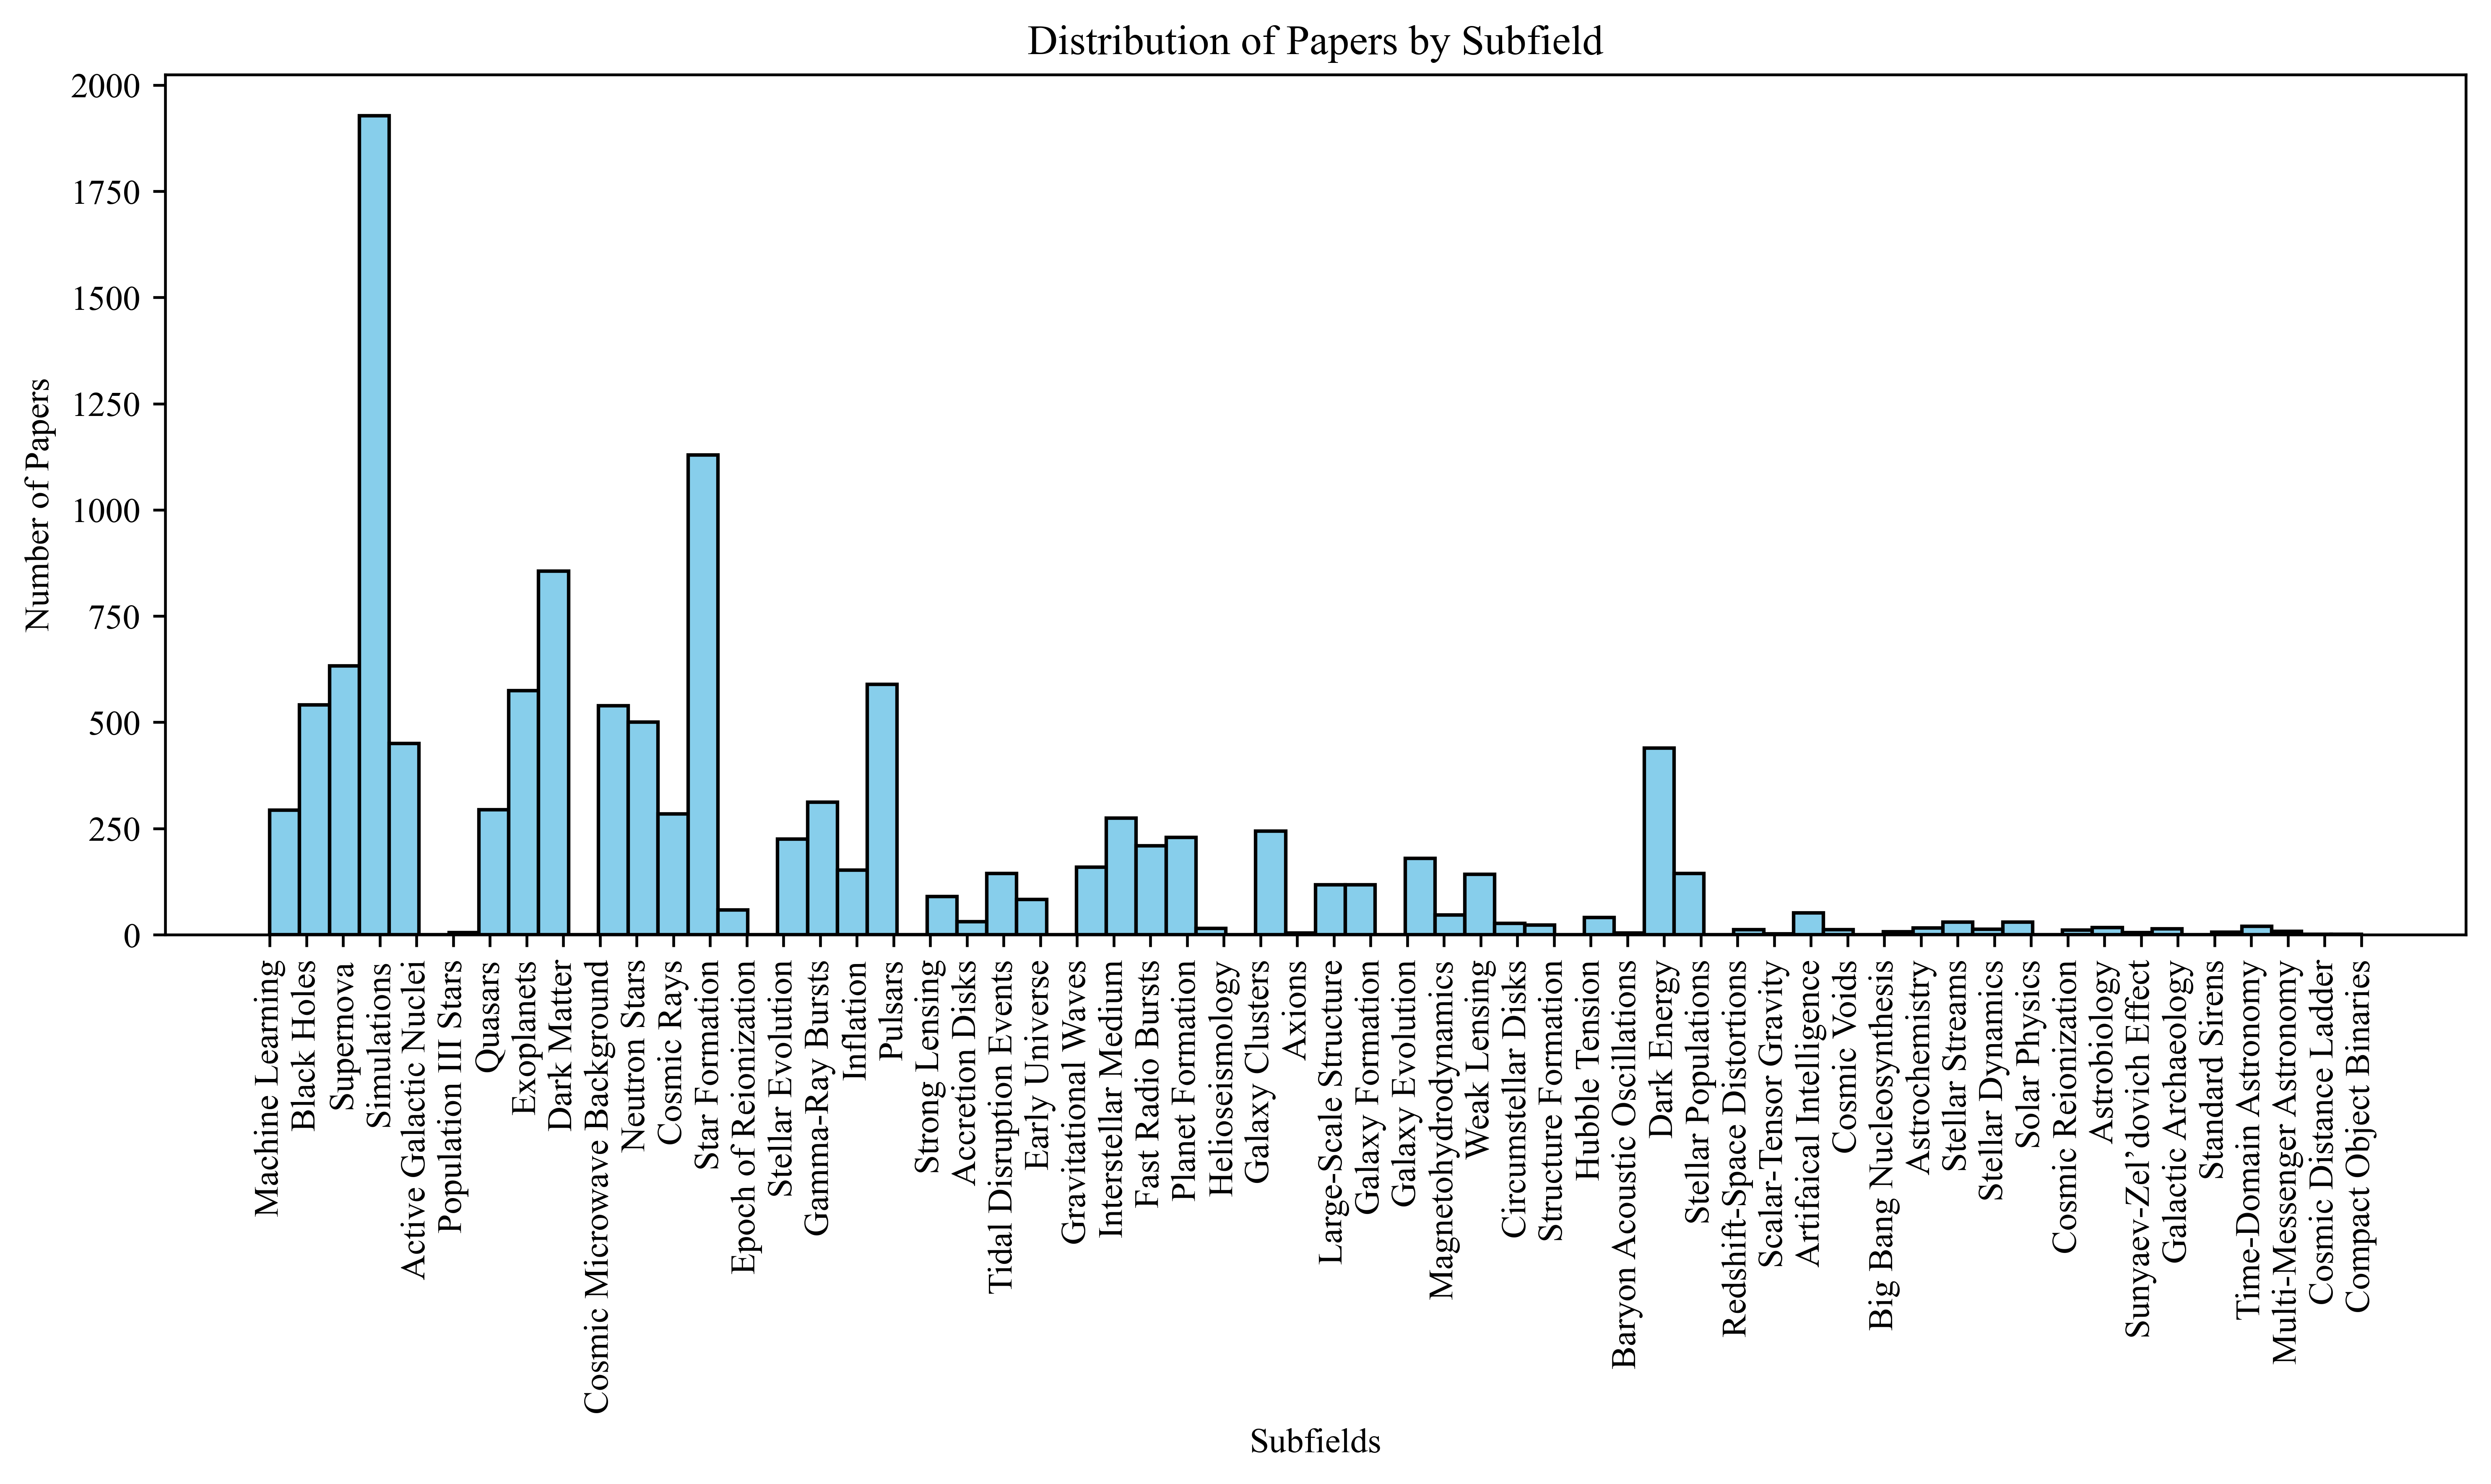

In [9]:
# Filter out 'Unclassified' entries
filtered_subfields = data[data['subfields'] != 'Unclassified']['subfields']

plt.figure(figsize=(10, 6))
plt.hist(filtered_subfields, bins=len(subfields), color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Subfields')
plt.ylabel('Number of Papers')
plt.title('Distribution of Papers by Subfield')
plt.tight_layout()
plt.show()

In [10]:
# Citations per Subfield
citations_per_subfield = data.groupby('subfields')['total_citations'].sum().reset_index()
citations_per_subfield = citations_per_subfield[citations_per_subfield['subfields'] != 'Unclassified']

citations_per_subfield

,subfields,total_citations
0,Accretion Disks,75.0
1,Active Galactic Nuclei,1410.0
2,Artifaical Intelligence,51.0
3,Astrobiology,8.0
4,Astrochemistry,6.0
5,Axions,4.0
6,Baryon Acoustic Oscillations,9.0
7,Big Bang Nucleosynthesis,5.0
8,Black Holes,2073.0
9,Circumstellar Disks,52.0


In [11]:
# Subfield per journal
subfield_journal_counts = data.groupby(['subfields', 'published_journal'])['title'].count().reset_index()
subfield_journal_counts = subfield_journal_counts[subfield_journal_counts['subfields'] != 'Unclassified']
subfield_journal_counts

,subfields,published_journal,title
0,Active Galactic Nuclei,2025NewA..11702361A,1
1,Active Galactic Nuclei,"A&A, 2025, Vol. 697, Article number A204",1
2,Active Galactic Nuclei,"Academia Quantum, 2025, 2",1
3,Active Galactic Nuclei,"ApJ, 979, 130 (2025)",1
4,Active Galactic Nuclei,"Astronomy & Astrophysics, 2025, Volume 704, id...",1
...,...,...,...
1156,Weak Lensing,"Journal = Physica Scripta, year = 2025, month ...",1
1157,Weak Lensing,"Nuclear Physics B 993, 116261 (2023)",1
1158,Weak Lensing,Phys. Lett. B 871 (2025) 140002,1
1159,Weak Lensing,Phys. Rev. Lett. 132 (2024) 021001,1


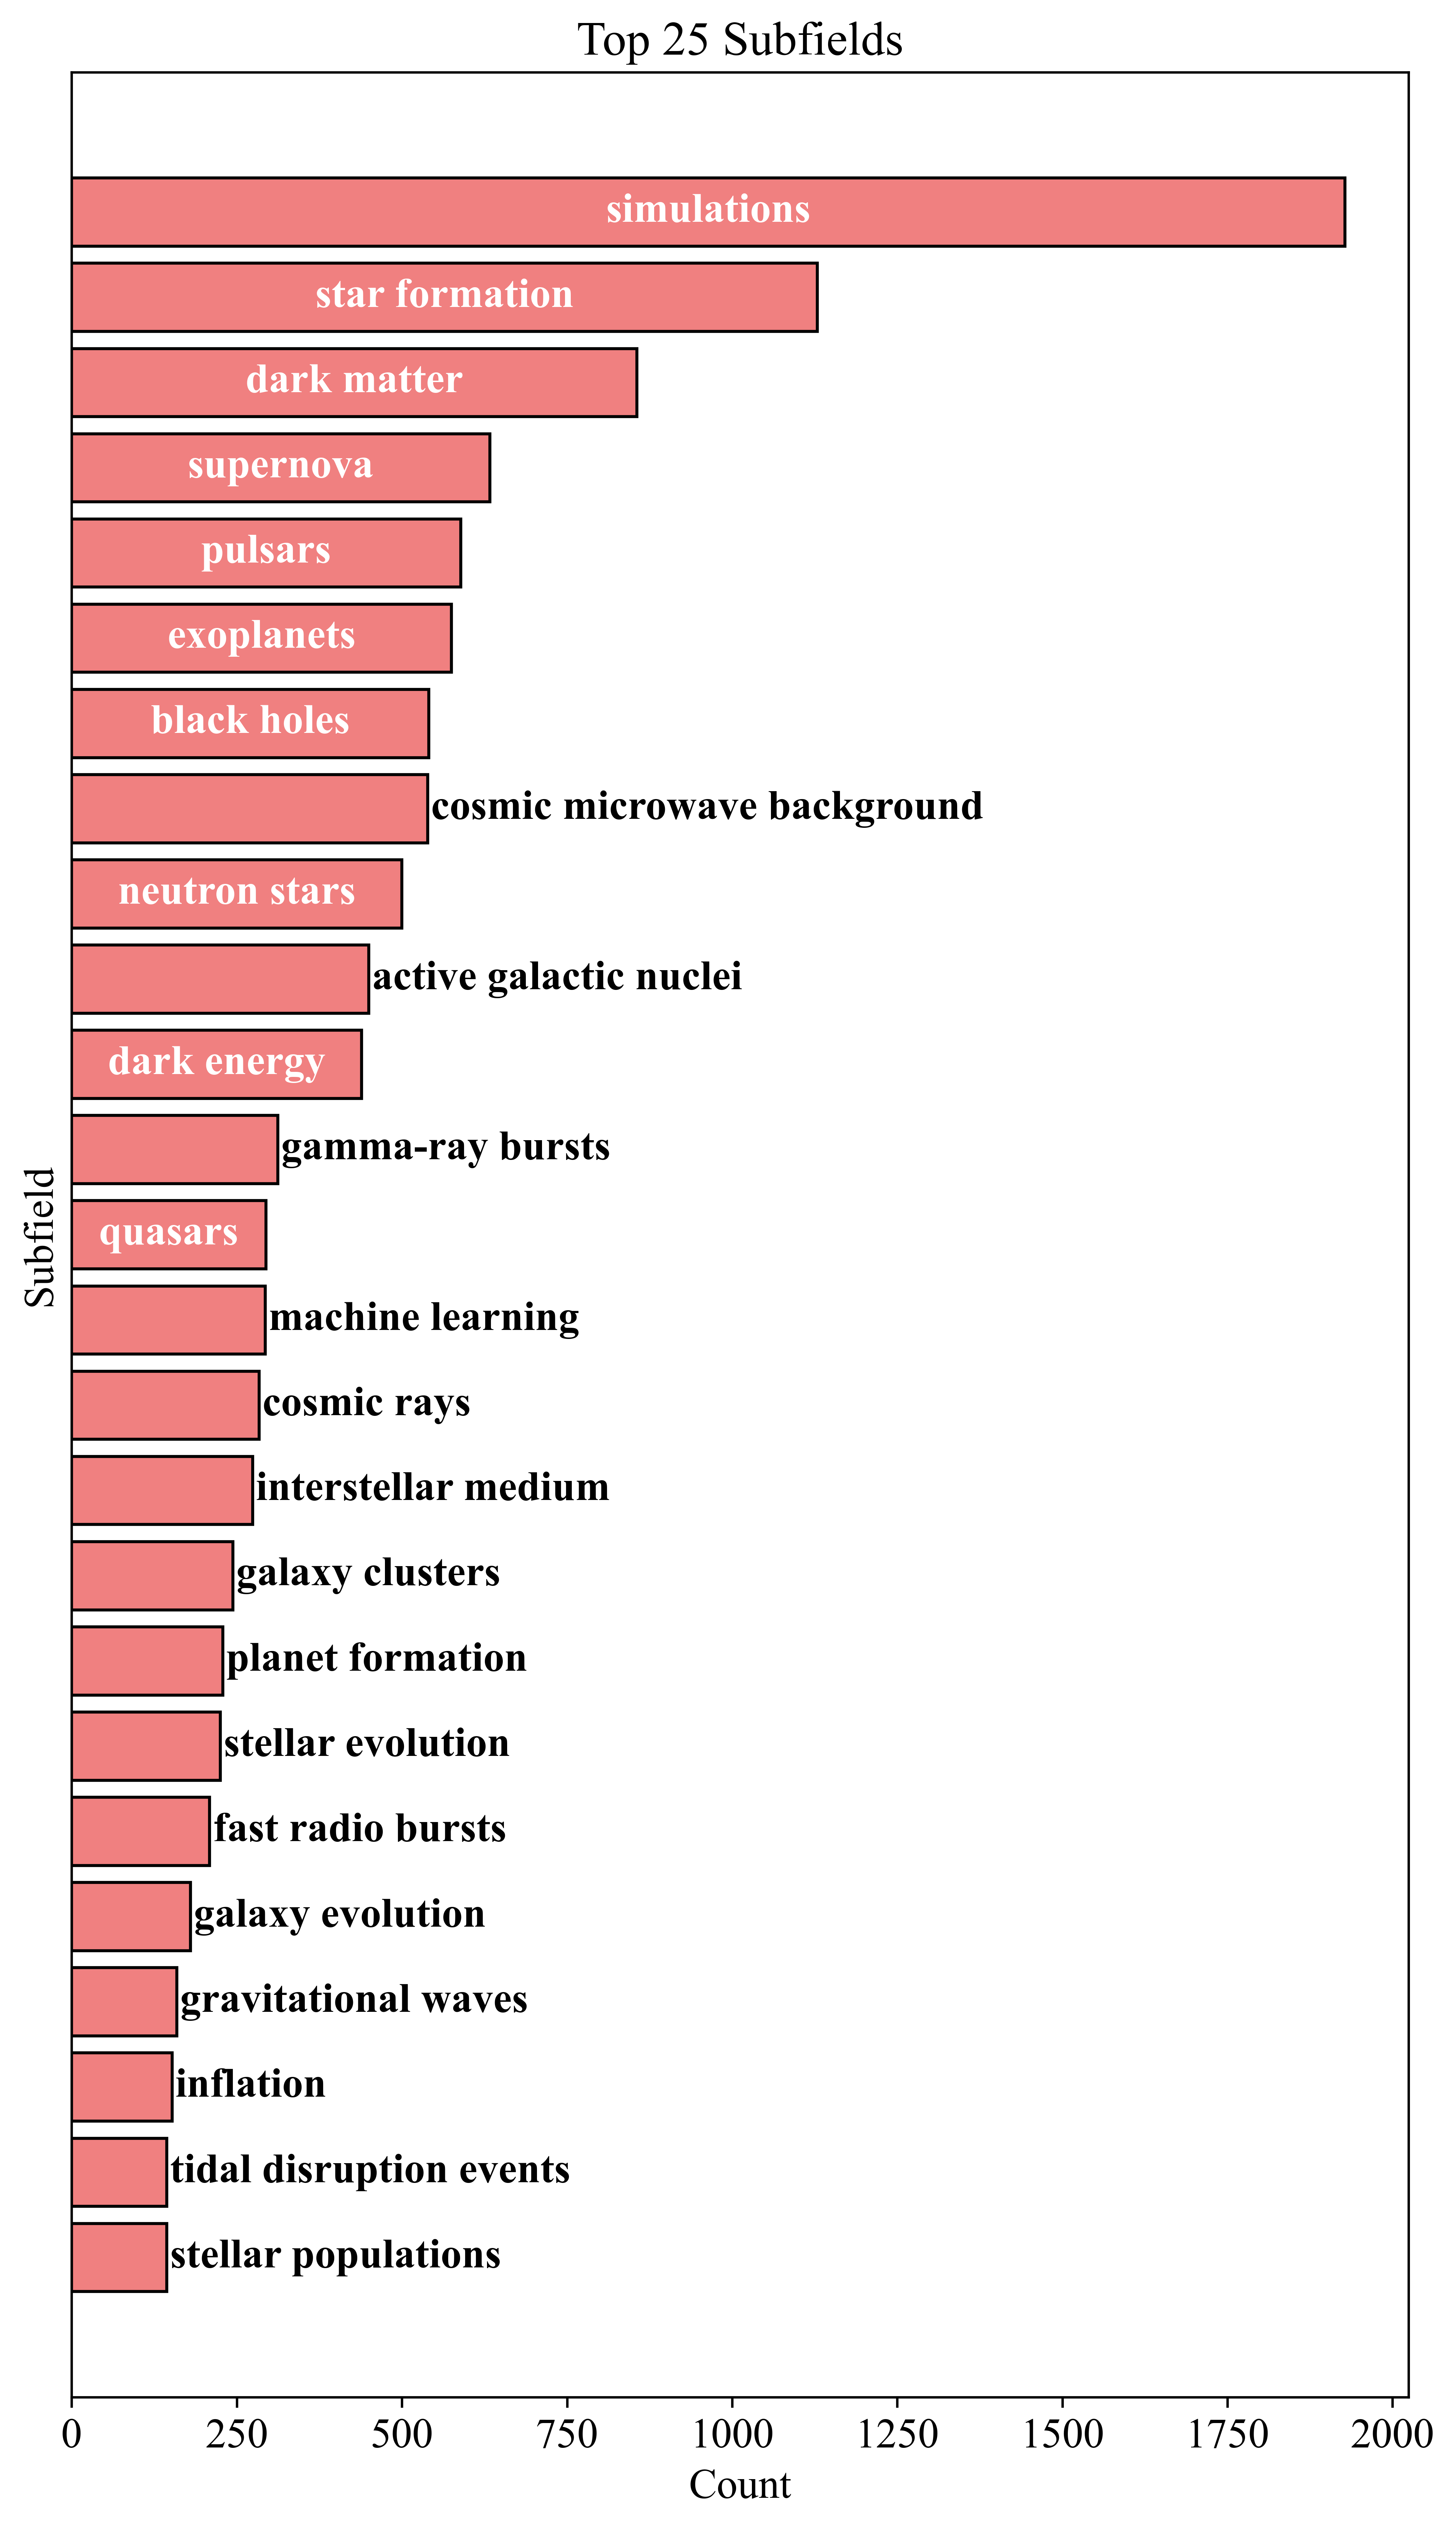

In [23]:
# Most common keywords
filtered_subfields = data[data['subfields'] != 'Unclassified']['subfields']

all_keywords = []
for keywords in filtered_subfields.dropna():
    # Split by comma and clean up whitespace and casing
    all_keywords.extend([kw.strip().lower() for kw in keywords.split(',')])

keyword_counts = Counter(all_keywords)
common_keywords = keyword_counts.most_common(25)
common_keywords_df = pd.DataFrame(common_keywords, columns=['Subfield', 'Count'])

plt.figure(figsize=(8, 14))
bars = plt.barh(common_keywords_df['Subfield'], common_keywords_df['Count'], color='lightcoral', edgecolor='black')
plt.title('Top 25 Subfields', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Subfield', fontsize=14)

# Remove y-axis ticks and labels (since we will label bars directly)
plt.yticks([]) 
plt.xticks(fontsize=14)
plt.gca().invert_yaxis()

# Add subfields inside or outside the bars depending on length
for bar, subfield in zip(bars, common_keywords_df['Subfield']):
    width = bar.get_width()
    
    # Heuristic: if text length relative to count is too large, put it outside
    # The multiplier '6' acts as an estimate of char width relative to data units
    if len(subfield) * 30 > width:
        plt.text(width + 5, bar.get_y() + bar.get_height()/2, subfield, 
                 va='center', ha='left', color='black', fontweight='bold', fontsize=14)
    else:
        plt.text(width / 2, bar.get_y() + bar.get_height()/2, subfield, 
                 va='center', ha='center', color='white', fontweight='bold', fontsize=14)

plt.show()

In [38]:
# Subfield per paper pages 
subfield_page_counts = data.groupby('subfields')['pages'].mean().reset_index()
subfield_page_counts = subfield_page_counts[subfield_page_counts['subfields'] != 'Unclassified']
print(subfield_page_counts)

subfield_table_counts = data.groupby('subfields')['tables'].mean().reset_index()
subfield_table_counts = subfield_table_counts[subfield_table_counts['subfields'] != 'Unclassified']
print(subfield_table_counts)

subfield_figure_counts = data.groupby('subfields')['figures'].mean().reset_index()
subfield_figure_counts = subfield_figure_counts[subfield_figure_counts['subfields'] != 'Unclassified']
print(subfield_figure_counts)

# Testing if the number of pages, tables and figures differ significantly across subfields
# Check if number for each subfield is within 1 standard deviation of the overall mean
overall_page_mean = data['pages'].mean()
overall_page_std = data['pages'].std()

overall_table_mean = data['tables'].mean()
overall_table_std = data['tables'].std()

overall_figure_mean = data['figures'].mean()
overall_figure_std = data['figures'].std()

significant_page_subfields = subfield_page_counts[
    (subfield_page_counts['pages'] > overall_page_mean + overall_page_std) |
    (subfield_page_counts['pages'] < overall_page_mean - overall_page_std)
]
significant_table_subfields = subfield_table_counts[
    (subfield_table_counts['tables'] > overall_table_mean + overall_table_std) |
    (subfield_table_counts['tables'] < overall_table_mean - overall_table_std)
]
significant_figure_subfields = subfield_figure_counts[
    (subfield_figure_counts['figures'] > overall_figure_mean + overall_figure_std) |
    (subfield_figure_counts['figures'] < overall_figure_mean - overall_figure_std)
]

print("Subfields with significant deviation in number of pages:")
print(significant_page_subfields)
print("Subfields with significant deviation in number of tables:")
print(significant_table_subfields)
print("Subfields with significant deviation in number of figures:")
print(significant_figure_subfields)

# If outside 1 sigma, then how many sigma away from the mean
def sigma_deviation(value, mean, std):
    return (value - mean) / std

significant_page_subfields['sigma_deviation'] = significant_page_subfields['pages'].apply(
    lambda x: sigma_deviation(x, overall_page_mean, overall_page_std)
)

print("Sigma deviations for pages:")
print(significant_page_subfields[['subfields', 'sigma_deviation']])

                       subfields      pages
0                Accretion Disks  18.354839
1         Active Galactic Nuclei  16.836283
2        Artifaical Intelligence  17.155556
3                   Astrobiology  20.117647
4                 Astrochemistry  26.200000
5                         Axions  18.000000
6   Baryon Acoustic Oscillations  21.000000
7       Big Bang Nucleosynthesis  14.428571
8                    Black Holes  17.545956
9            Circumstellar Disks  18.703704
10       Compact Object Binaries  17.000000
11        Cosmic Distance Ladder  12.000000
12   Cosmic Microwave Background  18.764259
13                   Cosmic Rays  14.108696
14           Cosmic Reionization  36.818182
15                  Cosmic Voids  19.833333
16                   Dark Energy  17.531178
17                   Dark Matter  18.408873
18                Early Universe  20.390244
19         Epoch of Reionization  17.228070
20                    Exoplanets  21.919440
21             Fast Radio Bursts

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_19501/1618619606.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_page_subfields['sigma_deviation'] = significant_page_subfields['pages'].apply(


In [24]:
# Citations per paper for each Subfield
# Total Citations per paper (AAC)
citations_per_paper_subfield = data.groupby('subfields')['total_citations'].mean().reset_index()
citations_per_paper_subfield = citations_per_paper_subfield[citations_per_paper_subfield['subfields'] != 'Unclassified']
citations_per_paper_subfield


# Top 10 Subfields by Citations per Paper
top_citations_per_paper_subfield = citations_per_paper_subfield.sort_values(by='total_citations', ascending=False).head(10)
top_citations_per_paper_subfield

,subfields,total_citations
42,Scalar-Tensor Gravity,11.500000
16,Dark Energy,8.594533
12,Cosmic Microwave Background,7.886827
14,Cosmic Reionization,6.818182
30,Inflation,5.440789
18,Early Universe,4.614458
19,Epoch of Reionization,4.120690
29,Hubble Tension,4.048780
8,Black Holes,3.831793
25,Galaxy Formation,3.576271


In [25]:
# EAAC
eaac_citations_per_paper_subfield = data.groupby('subfields')['non_self_citations'].mean().reset_index()
eaac_citations_per_paper_subfield = eaac_citations_per_paper_subfield[eaac_citations_per_paper_subfield['subfields'] != 'Unclassified']
eaac_citations_per_paper_subfield

# Top 10 Subfields 
top_eaac_citations_per_paper_subfield = eaac_citations_per_paper_subfield.sort_values(by='non_self_citations', ascending=False).head(20)
top_eaac_citations_per_paper_subfield

,subfields,non_self_citations
42,Scalar-Tensor Gravity,11.500000
16,Dark Energy,7.252847
12,Cosmic Microwave Background,6.703154
30,Inflation,4.848684
14,Cosmic Reionization,4.636364
18,Early Universe,3.253012
29,Hubble Tension,3.024390
11,Cosmic Distance Ladder,3.000000
8,Black Holes,2.824399
19,Epoch of Reionization,2.672414


In [26]:
# JAC 
journal_data = data['journal_flag'] == 1
journal_data = data[journal_data]

jac_citations_per_paper_subfield = journal_data.groupby('subfields')['total_citations'].mean().reset_index()
jac_citations_per_paper_subfield = jac_citations_per_paper_subfield[jac_citations_per_paper_subfield['subfields'] != 'Unclassified']
jac_citations_per_paper_subfield = jac_citations_per_paper_subfield.sort_values(by='total_citations', ascending=False).head(20)
jac_citations_per_paper_subfield

,subfields,total_citations
39,Scalar-Tensor Gravity,23.000000
9,Cosmic Microwave Background,15.573034
13,Dark Energy,9.627737
27,Inflation,8.673913
16,Epoch of Reionization,7.074074
15,Early Universe,6.606061
32,Multi-Messenger Astronomy,5.333333
26,Hubble Tension,4.444444
7,Black Holes,4.165254
55,Weak Lensing,4.040000


In [27]:
# EJAC 
ejac_citations_per_paper_subfield = journal_data.groupby('subfields')['non_self_citations'].mean().reset_index()
ejac_citations_per_paper_subfield = ejac_citations_per_paper_subfield[ejac_citations_per_paper_subfield['subfields'] != 'Unclassified']
ejac_citations_per_paper_subfield = ejac_citations_per_paper_subfield.sort_values(by='non_self_citations', ascending=False).head(20)
ejac_citations_per_paper_subfield

,subfields,non_self_citations
39,Scalar-Tensor Gravity,23.000000
9,Cosmic Microwave Background,13.286517
13,Dark Energy,8.065693
27,Inflation,7.695652
15,Early Universe,4.969697
16,Epoch of Reionization,4.481481
32,Multi-Messenger Astronomy,3.333333
7,Black Holes,3.055085
52,Tidal Disruption Events,2.893333
38,Redshift-Space Distortions,2.800000


In [31]:
# Put the citation metrics together in a table
subfield_citation_metrics = citations_per_paper_subfield.merge(
    eaac_citations_per_paper_subfield, on='subfields', suffixes=('_AAC', '_EAAC')
).merge(
    jac_citations_per_paper_subfield, on='subfields'
).merge(
    ejac_citations_per_paper_subfield, on='subfields', suffixes=('_JAC', '_EJAC')
)

# Sort by AAC citations
subfield_citation_metrics = subfield_citation_metrics.sort_values(by='total_citations_x', ascending=False)
subfield_citation_metrics

# Round to 2 decimal places
subfield_citation_metrics = subfield_citation_metrics.round(2)
subfield_citation_metrics

,subfields,total_citations_x,non_self_citations_JAC,total_citations_y,non_self_citations_EJAC
15,Scalar-Tensor Gravity,11.50,11.50,23.00,23.00
3,Dark Energy,8.59,7.25,9.63,8.07
1,Cosmic Microwave Background,7.89,6.70,15.57,13.29
2,Cosmic Reionization,6.82,4.64,4.00,2.25
11,Inflation,5.44,4.85,8.67,7.70
5,Early Universe,4.61,3.25,6.61,4.97
6,Epoch of Reionization,4.12,2.67,7.07,4.48
10,Hubble Tension,4.05,3.02,4.44,2.33
0,Black Holes,3.83,2.82,4.17,3.06
9,Galaxy Formation,3.58,2.04,3.37,2.10
